In [18]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==============================
# 1️⃣ Load Dataset
# ==============================
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [19]:
# Optional: create DataFrame for EDA
dataset = pd.DataFrame(X, columns=feature_names)
dataset['target'] = y
print(dataset.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [20]:
# ==============================
# 2️⃣ Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

In [21]:
# ==============================
# 3️⃣ MLflow Setup
# ==============================
# mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("YT_MLOPS_Exp1")


2026/01/03 05:24:09 INFO mlflow.tracking.fluent: Experiment with name 'YT_MLOPS_Exp1' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/4720d404264b434fb900fa7d9a722e0a', creation_time=1767399849774, experiment_id='0', last_update_time=1767399849774, lifecycle_stage='active', name='YT_MLOPS_Exp1', tags={}>

In [22]:
# ==============================
# Dogshub Setup
# ==============================
import dagshub
dagshub.init(repo_owner='RammaBhai', repo_name='YT_MLOPS_EXPERIMENT_WITH_MLFLOW', mlflow=True)

mlflow.set_tracking_uri("https://dagshub.com/RammaBhai/YT_MLOPS_EXPERIMENT_WITH_MLFLOW.mlflow")
# import mlflow
# with mlflow.start_run():
#   mlflow.log_param('parameter name', 'value')
#   mlflow.log_metric('metric name', 1)

Initialized MLflow to track repo "RammaBhai/YT_MLOPS_EXPERIMENT_WITH_MLFLOW"

Repository RammaBhai/YT_MLOPS_EXPERIMENT_WITH_MLFLOW initialized!

Accuracy: 1.0
Confusion Matrix:
[[7 0 0]
 [0 7 0]
 [0 0 4]]


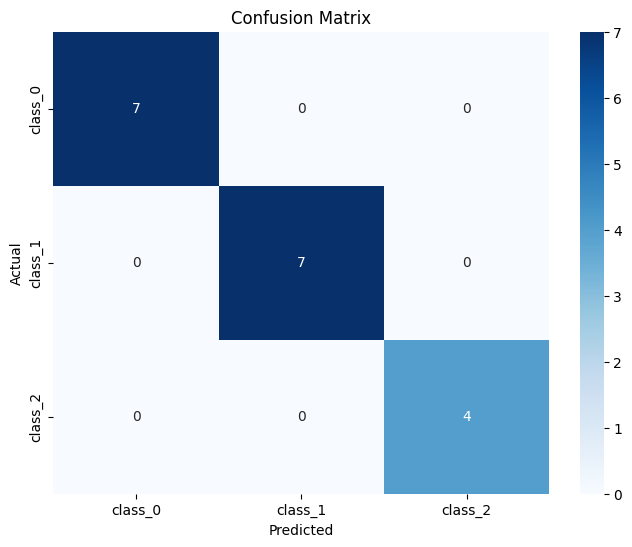

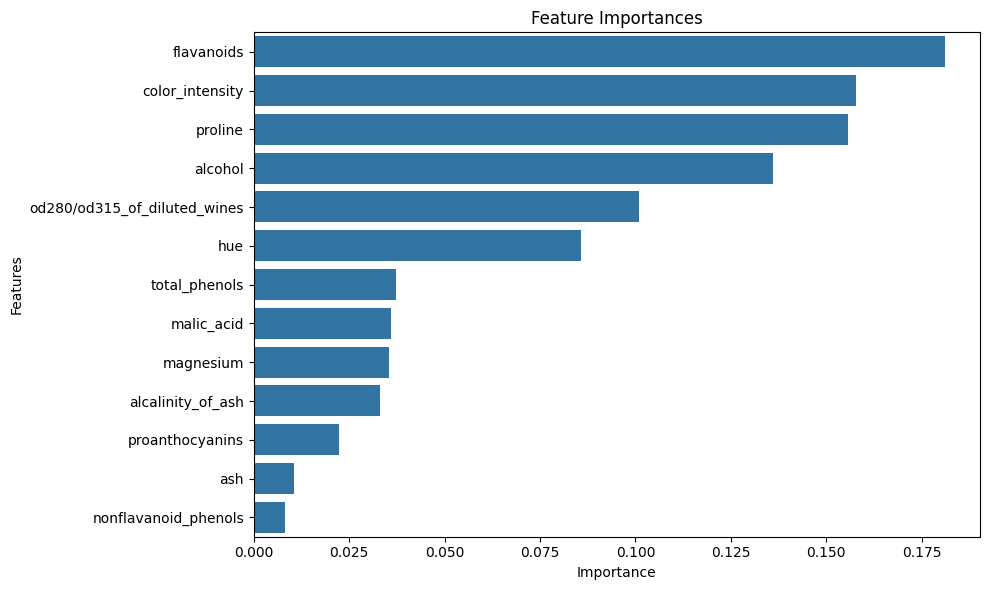

🏃 View run abrasive-rat-860 at: https://dagshub.com/RammaBhai/YT_MLOPS_EXPERIMENT_WITH_MLFLOW.mlflow/#/experiments/0/runs/986db673eb9f49928acd2e585f622bfe
🧪 View experiment at: https://dagshub.com/RammaBhai/YT_MLOPS_EXPERIMENT_WITH_MLFLOW.mlflow/#/experiments/0


In [23]:
with mlflow.start_run() as run:
    # ------------------------------
    # Train Model
    # ------------------------------
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # ------------------------------
    # Metrics
    # ------------------------------
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")

    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)

     # ------------------------------
    # Confusion Matrix Plot
    # ------------------------------
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    cm_path = "confusion_matrix.png"
    plt.savefig(cm_path)
    mlflow.log_artifact(cm_path)
    plt.show()

# ------------------------------
    # Feature Importance
    # ------------------------------
    importances = rf.feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=feat_imp, y=feat_imp.index)
    plt.title("Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    fi_path = "feature_importances.png"
    plt.savefig(fi_path)
    mlflow.log_artifact(fi_path)
    plt.show()

In [24]:

    # ------------------------------
    # Tags (optional)
    # ------------------------------
    mlflow.set_tag("author", "IAm Ramma")
    mlflow.set_tag("dataset", "Wine")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("project", "YT_MLOPS_Exp1")
    mlflow.set_tag("stage", "development")  # development / production

    # ------------------------------
    # Log Model
    # ------------------------------
    mlflow.sklearn.log_model(rf, "random_forest_model")

2026/01/03 05:24:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
